##Introducción
La predicción del precio de viviendas es una tarea fundamental en el sector inmobiliario y financiero, ya que permite evaluar el valor de las propiedades de manera precisa y fundamentada. Comprender cómo diversos factores, como la ubicación, el tamaño, las características de la propiedad y las condiciones del mercado, afectan el precio de una vivienda es crucial para compradores, vendedores y agentes inmobiliarios.

En este trabajo, se analizará un conjunto de datos relacionado con propiedades residenciales y se construirá un modelo de regresión para predecir el precio de las viviendas en función de sus principales atributos. Este enfoque busca proporcionar herramientas analíticas que ayuden en la toma de decisiones informadas en el mercado inmobiliario.

## Descripción del Problema

El mercado inmobiliario juega un rol fundamental en la economía global, ya que impacta tanto a inversores locales como internacionales. La predicción precisa del precio de las viviendas es esencial para comprender las dinámicas del mercado, optimizar inversiones y facilitar la toma de decisiones tanto para compradores como vendedores. Los precios de las propiedades están influenciados por una variedad de factores económicos, sociales y estructurales, lo que convierte esta tarea en un desafío complejo.

En este trabajo, se busca analizar un conjunto de datos que contiene información detallada sobre propiedades residenciales y explorar las relaciones entre sus características principales y los precios de venta.

## Objetivo

El objetivo principal de este proyecto es construir un modelo de regresión que permita predecir con precisión el precio de las viviendas en función de sus atributos más relevantes. Para ello, se llevará a cabo un análisis exploratorio de los datos, se evaluarán las relaciones entre las variables y se desarrollarán modelos predictivos utilizando técnicas avanzadas de machine learning.


## Fuente

Los datos utilizados en este proyecto fueron obtenidos de Kaggle y están disponibles en el siguiente enlace: https://www.kaggle.com/datasets/fratzcan/usa-house-prices.

Este conjunto de datos incluye información clave sobre propiedades, como el número de dormitorios y baños, la superficie habitable, la calidad de las vistas, la presencia de una vista al agua, el año de construcción o renovación, y la ubicación geográfica. Estas características proporcionan una base sólida para comprender las tendencias del mercado y desarrollar modelos predictivos efectivos.

## Importación de Librerías y Carga de Datos




In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import skew
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from datetime import datetime

In [76]:
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
def download_and_read_csv_from_google_drive(file_id):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    csv_path = "./data.csv"

    # Descargar el archivo directamente usando gdown
    gdown.download(url, csv_path, quiet=False)

    # Leer el CSV descargado
    df = pd.read_csv(csv_path)
    return df

In [78]:
# ID del archivo de Google Drive
file_id = "11y-WopZImargorKW7-9TH4GgUUTazeYb"

In [79]:
df = download_and_read_csv_from_google_drive(file_id)

Downloading...
From: https://drive.google.com/uc?export=download&id=11y-WopZImargorKW7-9TH4GgUUTazeYb
To: /content/data.csv
100%|██████████| 470k/470k [00:00<00:00, 7.50MB/s]


## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [80]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [81]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

#### 1. **Cantidad de registros**
- El dataset contiene un total de **4,140 registros**, lo que representa un tamaño manejable para realizar análisis exploratorios y construir modelos predictivos.

#### 2. **Tipos de datos**
- **Numéricos**:
  - 4 columnas de tipo `float64` (por ejemplo, `price`, `bedrooms`, `bathrooms`, `floors`).
  - 9 columnas de tipo `int64` (por ejemplo, `sqft_living`, `waterfront`, `yr_built`).
  
- **Categóricos**:
  - 5 columnas de tipo `object` (por ejemplo, `date`, `street`, `city`, `statezip`, `country`).

#### 3. **Valores nulos**
- El dataset no presenta valores nulos, ya que todas las columnas tienen un conteo completo de 4,140 registros. Esto facilita el análisis, ya que no será necesario realizar imputaciones o eliminar registros.

#### 4. **Variable objetivo (`price`)**
- La variable objetivo es **`price`**, de tipo `float64`, que representa el precio de venta de las propiedades en dólares estadounidenses.
  - Es una variable continua, y el rango de precios debe ser explorado para identificar posibles valores atípicos o patrones de distribución.
  - La relación entre `price` y otras variables como `bedrooms`, `bathrooms`, `sqft_living`, entre otras, será clave para el análisis.

#### 5. **Conclusión preliminar**
- Dado que no hay valores nulos, se puede proceder directamente con el análisis exploratorio y la preparación de los datos.
- Las columnas categóricas (`street`, `city`, `statezip`, `country`) podrían necesitar codificación adecuada para su inclusión en modelos de machine learning.
- Variables como `waterfront`, `view` y `condition` tienen potencial para ser fuertes predictores de `price` y deben ser analizadas con cuidado.

In [83]:
# Convertir la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [84]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

In [85]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,4140,2014-06-10 16:24:41.739130368,2014-05-02 00:00:00,2014-05-27 00:00:00,2014-06-12 00:00:00,2014-06-25 00:00:00,2014-07-10 00:00:00,NaN
price,4140.0,553062.877289,0.0,320000.0,460000.0,659125.0,26590000.0,583686.452245
bedrooms,4140.0,3.400483,0.0,3.0,3.0,4.0,8.0,0.903939
bathrooms,4140.0,2.163043,0.0,1.75,2.25,2.5,6.75,0.784733
sqft_living,4140.0,2143.638889,370.0,1470.0,1980.0,2620.0,10040.0,957.481621
sqft_lot,4140.0,14697.638164,638.0,5000.0,7676.0,11000.0,1074218.0,35876.838123
floors,4140.0,1.51413,1.0,1.0,1.5,2.0,3.5,0.534941
waterfront,4140.0,0.007488,0.0,0.0,0.0,0.0,1.0,0.086219
view,4140.0,0.246618,0.0,0.0,0.0,0.0,4.0,0.790619
condition,4140.0,3.452415,1.0,3.0,3.0,4.0,5.0,0.678533


Eliminamos ahora la columna date original, dado que ya tenemos las de año, mes, día y día de semana que son suficientes para las predicciones.

In [86]:
df = df.drop(columns=['date'])

### Generalidades
- El dataset tiene un total de **4,140 registros**.
- Las variables están correctamente escaladas, aunque se identifican algunos valores extremos en ciertas columnas, que podrían requerir validación adicional.

#### Análisis de variables numéricas

1. **price (precio)**:
   - Promedio: 553,062.88.
   - Rango: Desde 0 hasta 26,590,000.
   - El desvío estándar es 583,686.45, indicando una alta dispersión, probablemente debido a propiedades de muy alto valor.

2. **bedrooms (habitaciones)**:
   - Promedio: 3.4.
   - Rango: Desde 0 hasta 8.
   - La mediana es 3, lo que sugiere que la mayoría de las propiedades tienen entre 3 y 4 habitaciones.

3. **bathrooms (baños)**:
   - Promedio: 2.16.
   - Rango: Desde 0 hasta 6.75.
   - Los valores parecen razonables, con un desvío estándar moderado de 0.78.

4. **sqft_living (superficie habitable en pies cuadrados)**:
   - Promedio: 2,143.64.
   - Rango: Desde 370 hasta 10,040.
   - Los valores altos podrían corresponder a propiedades de lujo.

5. **sqft_lot (tamaño del terreno en pies cuadrados)**:
   - Promedio: 14,697.64.
   - Rango: Desde 638 hasta 1,074,218.
   - Existe una alta dispersión con un desvío estándar de 35,876.84, lo que podría deberse a propiedades con terrenos excepcionalmente grandes.

6. **floors (pisos)**:
   - Promedio: 1.51.
   - Rango: Desde 1 hasta 3.5.
   - La mayoría de las propiedades tienen entre 1 y 2 pisos.

7. **waterfront (frente al agua)**:
   - Promedio: 0.007.
   - Rango: Desde 0 hasta 1.
   - Solo un pequeño porcentaje de propiedades tienen esta característica.

8. **view (vista)**:
   - Promedio: 0.25.
   - Rango: Desde 0 hasta 4.
   - La mayoría de las propiedades no tienen vistas destacables.

9. **condition (condición)**:
   - Promedio: 3.45.
   - Rango: Desde 1 hasta 5.
   - La mayoría de las propiedades tienen una condición promedio o buena.

10. **sqft_above (superficie sobre el nivel del suelo en pies cuadrados)**:
    - Promedio: 1,831.35.
    - Rango: Desde 370 hasta 8,020.
    - Los valores son consistentes con la variable de superficie total.

11. **sqft_basement (superficie del sótano en pies cuadrados)**:
    - Promedio: 312.29.
    - Rango: Desde 0 hasta 4,820.
    - Muchas propiedades no tienen sótano, lo que se refleja en la mediana de 0.

12. **yr_built (año de construcción)**:
    - Promedio: 1970.81.
    - Rango: Desde 1900 hasta 2014.
    - Las propiedades más antiguas datan de principios del siglo XX.

13. **yr_renovated (año de renovación)**:
    - Promedio: 808.37.
    - Rango: Desde 0 hasta 2014.
    - La mayoría de las propiedades no han sido renovadas, como lo indica la mediana de 0.

#### Observaciones generales
- **Valores extremos**: Variables como `price`, `sqft_lot` y `sqft_living` presentan valores extremadamente altos que podrían ser outliers.
- **Distribuciones**: Las variables `bedrooms` y `bathrooms` parecen estar dentro de rangos esperados, con distribuciones razonables.
- **Datos faltantes**: No se mencionan explícitamente en este análisis, pero podrían estar presentes en columnas como `yr_renovated` debido a los valores de 0 que representan renovaciones no realizadas.


## Preprocesamiento de Datos


En esta sección, realizamos tareas de limpieza y preparación de datos para que estén listos para la construcción de modelos.

- Manejo de Valores Faltantes: Identificar y tratar los valores faltantes en las columnas relevantes.
- Codificación de Variables Categóricas: Convertir variables categóricas en formato numérico (por ejemplo, one-hot encoding).
- Normalización/Estandarización: Realizar normalización o estandarización si es necesario.
- Selección de Características: Seleccionar las características más relevantes si es necesario.

### Nuevas columnas

In [87]:
# Obtener el año actual
anio_actual = datetime.now().year

# Calcular la antigüedad desde el año de construcción y desde la renovación
df['yrs_built'] = anio_actual - df['yr_built']
df['yrs_renovated'] = df['yr_renovated'].apply(lambda x: anio_actual - x if x != 0 else -1)

# Eliminar las columnas originales y las columnas innecesarias
df = df.drop(columns=['yr_built', 'yr_renovated'])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      4140 non-null   int64  
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  street         4140 non-null   object 
 12  city           4140 non-null   object 
 13  statezip       4140 non-null   object 
 14  country        4140 non-null   object 
 15  year           4140 non-null   int32  
 16  month          4140 non-null   int32  
 17  day            4140 non-null   int32  
 18  weekday 

## Funciones de preprocesamiento

### Outliers

In [89]:
def calcular_outliers_iqr(df):
    """
    Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame con columnas numéricas y su porcentaje de outliers,
                      ordenadas en orden decreciente.
    """
    resultados = []

    for columna in df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if df[columna].nunique() == 2:
            continue

        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

### Valores nulos

In [90]:
def calcular_porcentaje_nulos(df):
    """
    Calcula el porcentaje de valores nulos por columna y devuelve las columnas
    con valores nulos en orden decreciente según el porcentaje.

    Args:
    df (pd.DataFrame): DataFrame a analizar.

    Returns:
    pd.DataFrame: DataFrame con columnas `columna` y `porcentaje_nulos`.
    """
    # Calcular porcentaje de nulos
    porcentaje_nulos = df.isnull().mean() * 100

    # Filtrar columnas con nulos y ordenar en orden decreciente
    nulos_df = (porcentaje_nulos[porcentaje_nulos > 0]
                .sort_values(ascending=False)
                .reset_index())
    nulos_df.columns = ['columna', 'porcentaje_nulos']

    return nulos_df

In [91]:
def imputar_valores_nulos(data, columnas_outliers):
    """
    Imputa los valores nulos en el DataFrame según las reglas especificadas:
    - Para las variables numéricas:
        - Si no tiene outliers, se imputa con la media.
        - Si tiene outliers, se imputa con la mediana.
    - Para las variables categóricas, se imputa con la moda.

    Parámetros:
        data (pd.DataFrame): El DataFrame de entrada con los valores nulos.
        columnas_outliers (list): Lista con los nombres de las columnas con outliers.

    Devuelve:
        pd.DataFrame: El DataFrame con los valores nulos imputados.
    """
    for col in data.columns:
        if data[col].dtype == 'object':  # Categóricas
            # Imputar con la moda para columnas categóricas
            moda = data[col].mode()[0]
            data[col] = data[col].fillna(moda)

        else:  # Numéricas
            if col in columnas_outliers:
                # Imputar con la mediana si la columna tiene outliers
                mediana = data[col].median()
                data[col] = data[col].fillna(mediana)
            else:
                # Imputar con la media si la columna no tiene outliers
                media = data[col].mean()
                data[col] = data[col].fillna(media)

    return data

### Eliminamos columnas irrelevantes

In [92]:
def eliminar_columnas_irrelevantes(data):
    """
    Elimina columnas irrelevantes del DataFrame.
    - Elimina columnas con un solo valor.
    - Elimina columnas específicas como 'id' y 'year'.

    Parámetros:
        data (pd.DataFrame): El DataFrame que contiene las variables a procesar.

    Devuelve:
        pd.DataFrame: El DataFrame con las columnas irrelevantes eliminadas.
    """
    # Eliminar columnas con un solo valor
    columnas_a_eliminar = [col for col in data.columns if len(data[col].unique()) == 1]

    # Eliminamos las columnas del DataFrame
    data = data.drop(columns=columnas_a_eliminar, axis=1)

    return data

### Encoding y normalizado

In [93]:
def preprocesar_data(data):
    """
    Preprocesa el conjunto de entrenamiento.
    - Aplica One Hot Encoding en variables categóricas con <= 8 categorías.
    - Aplica Label Encoding en variables categóricas con > 8 categorías.
    - Escala las variables numéricas según su asimetría (StandardScaler o MinMaxScaler).
    """
    data = data.copy()

    # Inicializamos los transformadores
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    label_encoder = LabelEncoder()
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    # Identificamos variables categóricas y numéricas
    categorias = data.select_dtypes(include=['object']).columns
    numericas = data.select_dtypes(exclude=['object']).columns

    # Codificación de variables categóricas
    for col in categorias:
        if data[col].nunique() <= 8:
            encoded = onehot_encoder.fit_transform(data[[col]])
            encoded_df = pd.DataFrame(
                encoded,
                columns=onehot_encoder.get_feature_names_out([col]),
                index=data.index
            )
            data = pd.concat([data, encoded_df], axis=1)
            data.drop(columns=[col], inplace=True)
        else:
            data[col] = label_encoder.fit_transform(data[col])

    # Actualizamos lista de numéricas (por si el encoding agregó columnas)
    numericas = data.select_dtypes(exclude=['object']).columns

    # Escalado numérico según skewness
    for col in numericas:
        skewness = skew(data[col].dropna())
        if abs(skewness) > 1:
            data[col] = minmax_scaler.fit_transform(data[[col]])
        else:
            data[col] = standard_scaler.fit_transform(data[[col]])

    return data

## Construcción de Modelos


En esta sección, construimos modelos de clasificación utilizando el conjunto de datos preparado.

- Selección de Algoritmos: Elegir algoritmos de clasificación adecuados (por ejemplo, Regresión Logística, Random Forest, SVM).
- Entrenamiento de Modelos: Entrenar modelos utilizando el conjunto de entrenamiento.
- Ajuste de Hiperparámetros: Ajustar hiperparámetros para optimizar el rendimiento de los modelos.

In [94]:
semilla = 142857

In [95]:
# X será todo menos la columna 'Status' (la target)
X = df.drop(columns=['price'])

# y será la columna 'Status' (la target)
y = df['price']

# Realizamos el split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (2898, 20)
Tamaño de X_test: (1242, 20)
Tamaño de y_train: (2898,)
Tamaño de y_test: (1242,)


Para garantizar la validez del modelo, todas las transformaciones deben aprenderse **exclusivamente a partir del conjunto de entrenamiento** (*train*), y luego aplicarse al conjunto de prueba (*test*).  
Esto evita que el modelo “vea” información del test antes de ser evaluado.

El flujo aplicado es el siguiente:

1. **División inicial:**  
   Primero se separan los datos en `X_train` y `X_test` (junto con `y_train` y `y_test`), antes de realizar cualquier imputación, escalado o codificación.

2. **Procesamiento del conjunto de entrenamiento:**  
   - Se identifican y tratan *outliers* en el train.  
   - Se imputan valores nulos (calculando medias, medianas o modas solo con el train).  
   - Se ajustan (fit) los encoders y escaladores usando exclusivamente el train.  
   - Se transforman (transform) los datos del train.

3. **Procesamiento del conjunto de prueba:**  
   - Se aplican al test exactamente los mismos parámetros aprendidos en el train:  
     - Los mismos valores de imputación (medias, medianas, modas).  
     - Los mismos *encoders* ya ajustados.  
     - Los mismos escaladores (misma media, desviación o rango del train).  

De esta manera, **no se produce fuga de información (*data leakage*)**, y la evaluación del modelo refleja su desempeño real frente a datos nuevos.


In [96]:
outliers_df = calcular_outliers_iqr(X_train)
columnas_outliers = outliers_df['Columna'].tolist()

In [97]:
X_train = imputar_valores_nulos(X_train, columnas_outliers)

In [98]:
valores_imputacion = {}

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        valores_imputacion[col] = X_train[col].mode()[0]
    elif col in columnas_outliers:
        valores_imputacion[col] = X_train[col].median()
    else:
        valores_imputacion[col] = X_train[col].mean()

for col, valor in valores_imputacion.items():
    if col in X_test.columns:
        X_test[col] = X_test[col].fillna(valor)

In [99]:
def preprocesar_train(data):
    return preprocesar_data(data)

In [100]:
def preprocesar_test(data_train, data_test):
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
    from scipy.stats import skew
    import numpy as np
    import pandas as pd

    data = data_test.copy()

    # Columnas categóricas (del train original)
    categorias = data_train.select_dtypes(include=['object']).columns.tolist()

    # Codificación categórica
    for col in categorias:
        if col not in data.columns:
            continue  # si no existe en test, la salteamos
        if data_train[col].nunique() <= 8:
            encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
            encoder.fit(data_train[[col]])
            encoded = encoder.transform(data[[col]])
            encoded_df = pd.DataFrame(
                encoded,
                columns=encoder.get_feature_names_out([col]),
                index=data.index
            )
            data = pd.concat([data, encoded_df], axis=1)
            data.drop(columns=[col], inplace=True)
        else:
            le = LabelEncoder()
            le.fit(data_train[col])
            data[col] = data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

    # 🔧 Ahora que el encoding terminó, identificamos las columnas numéricas finales
    numericas_train = data_train.select_dtypes(include=['number']).columns.tolist()
    numericas_test = data.select_dtypes(include=['number']).columns.tolist()

    # Intersección: columnas numéricas presentes en ambos datasets
    numericas = [col for col in numericas_test if col in numericas_train]

    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    for col in numericas:
        # Seguridad extra: si la columna no existe en train, continuar
        if col not in data_train.columns:
            continue

        # Calcular skewness solo si train tiene valores numéricos válidos
        if not np.issubdtype(data_train[col].dtype, np.number):
            continue

        skewness = skew(data_train[col].dropna())
        if abs(skewness) > 1:
            minmax_scaler.fit(data_train[[col]])
            data[col] = minmax_scaler.transform(data[[col]])
        else:
            standard_scaler.fit(data_train[[col]])
            data[col] = standard_scaler.transform(data[[col]])

    return data

In [101]:
X_train_proc = preprocesar_train(X_train)

/tmp/ipython-input-3179902574.py:39: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(data[col].dropna())


In [102]:
X_test_proc = preprocesar_test(X_train, X_test)

/tmp/ipython-input-1822497282.py:51: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(data_train[col].dropna())


In [103]:
train_df = pd.concat([X_train_proc.reset_index(drop=True),
                      y_train.reset_index(drop=True)], axis=1)

In [104]:
test_df  = pd.concat([X_test_proc.reset_index(drop=True),
                      y_test.reset_index(drop=True)], axis=1)

Ahora sí, pasamos a la parte de los modelos...

In [105]:
# Creo DF para ir guardando los resultados
column_names = ["Modelo", "R^2", "MAE", "MSE", "RMSE", "MAPE (%)", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

In [106]:
# Función para guardar los resultados (incluye MAPE)
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import numpy as np
    import pandas as pd

    # Calcular las métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Calcular MAPE (evitando división por cero)
    mape = np.mean(np.abs((y_test - y_pred) / np.where(y_test == 0, np.nan, y_test))) * 100

    # Crear diccionario con resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'R^2': [r2],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAPE (%)': [mape],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir a DataFrame
    resultados_df = pd.DataFrame(resultados_dict).dropna(axis=1, how='all')

    return resultados_df

In [107]:
def plot_predictions_vs_actuals(y_test, y_pred):
    # Crear un DataFrame con las predicciones y los valores reales
    df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

    # Establecer el estilo de seaborn
    sns.set(style="whitegrid")

    # Crear el gráfico de dispersión
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='Real', y='Predicted', color='blue', alpha=0.6, label='Predicciones', s=80)

    # Añadir la línea de referencia y=x
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea y=x')

    # Añadir título y etiquetas
    plt.title('Valores Reales vs Predicciones', fontsize=12)
    plt.xlabel('Valores Reales', fontsize=10)
    plt.ylabel('Predicciones', fontsize=10)

    # Mostrar la leyenda y la cuadrícula
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.4)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [108]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Gráfico para evaluar las predicciones
    plot_predictions_vs_actuals(y_test, y_pred)

In [109]:
# Volvemos a separar features (X) y target (y)
X_train = train_df.drop(columns=['price'])
y_train = train_df['price']

X_test = test_df.drop(columns=['price'])
y_test = test_df['price']

#### Regresión Lineal

In [110]:
modelo = LinearRegression()

/tmp/ipython-input-2525100636.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)


Resultados para el modelo: Regresión Lineal
             Modelo        R^2            MAE           MSE          RMSE  \
0  Regresión Lineal -18.098951  907301.866061  5.431583e+12  2.330576e+06   

     MAPE (%)    Tiempo  
0  220.307154  0.005933   



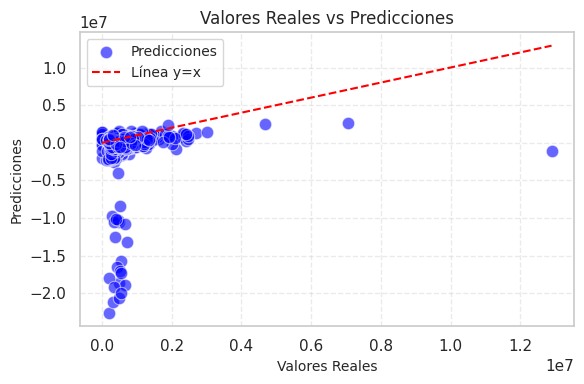

In [111]:
entrenar_modelo(modelo, 'Regresión Lineal', X_train, y_train, X_test, y_test)

#### Árbol de Decisión

In [112]:
modelo = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    random_state=semilla
)

Resultados para el modelo: Árbol de Decisión
              Modelo       R^2            MAE           MSE           RMSE  \
0  Árbol de Decisión  0.191569  197900.561903  2.299111e+11  479490.502245   

    MAPE (%)    Tiempo  
0  37.196772  0.018843   



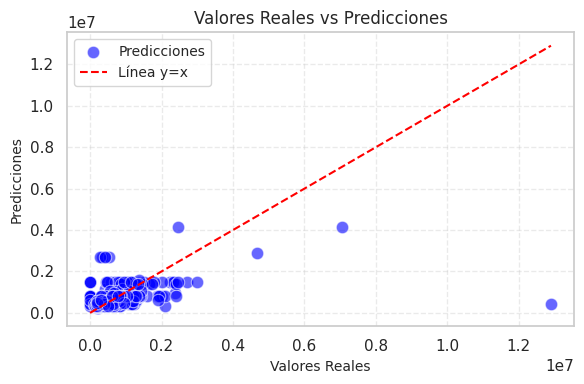

In [113]:
entrenar_modelo(modelo, 'Árbol de Decisión', X_train, y_train, X_test, y_test)

#### Random Forest

In [114]:
modelo = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=semilla
)

Resultados para el modelo: Random Forest
          Modelo       R^2           MAE           MSE           RMSE  \
0  Random Forest  0.195803  219825.60596  2.287068e+11  478233.015432   

    MAPE (%)    Tiempo  
0  45.739206  2.030295   



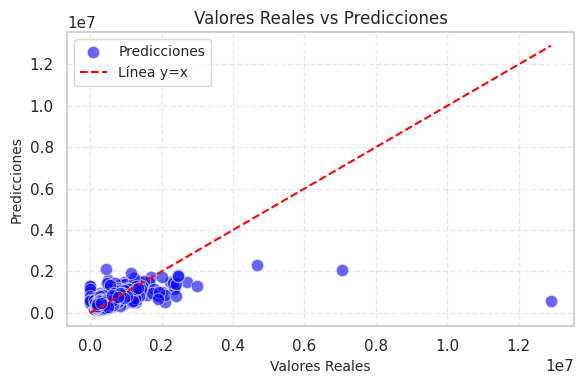

In [115]:
entrenar_modelo(modelo, 'Random Forest', X_train, y_train, X_test, y_test)

#### Gradient Boosting

In [116]:
modelo = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=semilla
)

Resultados para el modelo: Gradient Boosting
              Modelo       R^2            MAE           MSE           RMSE  \
0  Gradient Boosting  0.205297  201427.574609  2.260069e+11  475401.836906   

    MAPE (%)    Tiempo  
0  40.994314  1.207704   



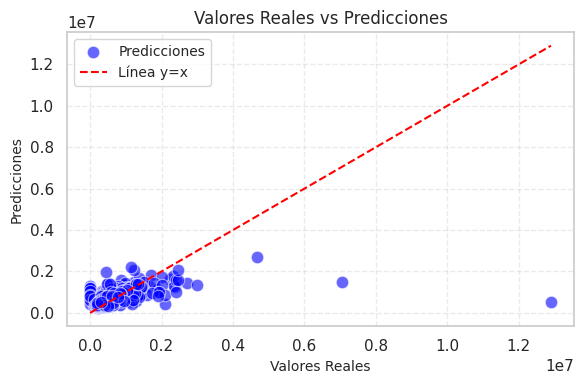

In [117]:
entrenar_modelo(modelo, 'Gradient Boosting', X_train, y_train, X_test, y_test)

Podemos hacer una prueba eliminando outliers de `price`...


In [118]:
# Calcular los cuartiles y el rango intercuartílico (IQR) para la columna 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los outliers
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Mostrar la cantidad de registros antes y después de eliminar los outliers
print(f"Registros antes de eliminar outliers: {len(df)}")
print(f"Registros después de eliminar outliers: {len(df_cleaned)}")

Registros antes de eliminar outliers: 4140
Registros después de eliminar outliers: 3925


In [119]:
# X será todo menos la columna 'Status' (la target)
X = df_cleaned.drop(columns=['price'])

# y será la columna 'Status' (la target)
y = df_cleaned['price']

# Realizamos el split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (2747, 20)
Tamaño de X_test: (1178, 20)
Tamaño de y_train: (2747,)
Tamaño de y_test: (1178,)


In [120]:
X_train_proc = preprocesar_train(X_train)

/tmp/ipython-input-3179902574.py:39: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(data[col].dropna())


In [121]:
X_test_proc = preprocesar_test(X_train, X_test)

/tmp/ipython-input-1822497282.py:51: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(data_train[col].dropna())


In [122]:
train_df = pd.concat([X_train_proc.reset_index(drop=True),
                      y_train.reset_index(drop=True)], axis=1)

In [123]:
test_df  = pd.concat([X_test_proc.reset_index(drop=True),
                      y_test.reset_index(drop=True)], axis=1)

In [124]:
X_train = train_df.drop(columns=['price'])
y_train = train_df['price']

X_test = test_df.drop(columns=['price'])
y_test = test_df['price']

Resultados para el modelo: Gradient Boosting - sin outliers
                             Modelo       R^2            MAE           MSE  \
0  Gradient Boosting - sin outliers  0.362215  136975.012702  3.231960e+10   

            RMSE   MAPE (%)    Tiempo  
0  179776.519167  30.727346  0.853507   



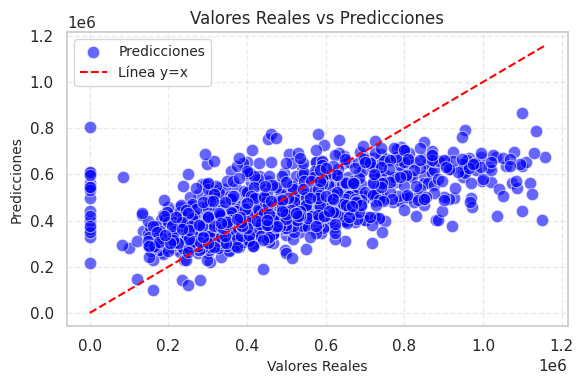

In [125]:
entrenar_modelo(modelo, 'Gradient Boosting - sin outliers', X_train, y_train, X_test, y_test)

## Conclusiones


*En* esta sección, resumimos los resultados y conclusiones clave del proyecto.

- Resumen de Resultados: Resumir los hallazgos y resultados.
- Cumplimiento del Objetivo: Evaluar si el modelo cumple con el objetivo de predecir el precio de las viviendas

In [126]:
resultados_df

,Modelo,R^2,MAE,MSE,RMSE,MAPE (%),Tiempo
0,Regresión Lineal,-18.098951,907301.866061,5.431583e+12,2.330576e+06,220.307154,0.005933
1,Árbol de Decisión,0.191569,197900.561903,2.299111e+11,4.794905e+05,37.196772,0.018843
2,Random Forest,0.195803,219825.605960,2.287068e+11,4.782330e+05,45.739206,2.030295
3,Gradient Boosting,0.205297,201427.574609,2.260069e+11,4.754018e+05,40.994314,1.207704
4,Gradient Boosting - sin outliers,0.362215,136975.012702,3.231960e+10,1.797765e+05,30.727346,0.853507


🧩 Conclusión técnica

Los outliers dominan el target (price): al removerlos, el modelo deja de “aprender” valores absurdamente altos y se centra en el rango representativo → mejora tanto R² como MAE/RMSE.

Gradient Boosting muestra la mejor relación sesgo-varianza, lo que confirma que el problema no es lineal y que técnicas en ensamble lo captan mejor.

La regresión lineal se descarta totalmente (R² < 0).
Es típica señal de fuerte heterocedasticidad y relaciones no lineales entre price y las features (sqft_living, view, etc.).

💡 Recomendaciones

Mantener el tratamiento de outliers, al menos sobre el target y variables continuas clave (por ejemplo, sqft_living, price, sqft_lot).

Probar normalizaciones robustas (como RobustScaler) en lugar de eliminar outliers, para no perder data valiosa.

Optimizar hiperparámetros del Gradient Boosting: n_estimators, max_depth, learning_rate y min_samples_leaf.

Evaluar una métrica logarítmica (log(price)) si la distribución del target es muy sesgada: suele mejorar estabilidad y R².

Comparar SHAP values o feature importance entre el modelo con y sin outliers, para ver si cambian los predictores dominantes (por ejemplo, sqft_living vs. view o condition).

### Recomendaciones y Pasos a Seguir

1. **Optimización de Random Forest**:
   - Dado que es el modelo con mejor desempeño, se recomienda ajustar sus hiperparámetros (número de árboles, profundidad máxima, número mínimo de muestras por hoja, etc.) para intentar mejorar su precisión y reducir el tiempo de ejecución.

2. **Exploración de Modelos Adicionales**:
   - Evaluar otros algoritmos como XGBoost o LightGBM, que pueden ofrecer un balance entre desempeño y tiempo de ejecución.

3. **Preprocesamiento de Datos**:
   - Analizar si la transformación de variables (escalado, normalización, etc.) o la creación de nuevas características puede mejorar los resultados.

4. **Validación Cruzada**:
   - Implementar validación cruzada para obtener una evaluación más robusta de los modelos y minimizar el riesgo de sobreajuste.

5. **Análisis de Importancia de Variables**:
   - Identificar las variables más relevantes para los modelos, lo que puede guiar esfuerzos adicionales en el preprocesamiento o en la recolección de datos.

6. **Reducción de Tiempo de Ejecución**:
   - En caso de requerir menor tiempo de ejecución, se podrían explorar técnicas de reducción de dimensionalidad (PCA, selección de características) o simplificación del conjunto de datos.

7. **Implementación y Monitoreo**:
   - Una vez seleccionado y optimizado el modelo, proceder con su implementación y establecer un sistema de monitoreo para garantizar su desempeño en producción.


...otros algoritmos que se pueden probar:
- Ridge
- Lasso
- ElasticNet
- KNeighborsRegressor
- ExtraTreesRegressor
- AdaBoostRegressor
- SVR
- MLPRegressor